## Problem Statement

Predicting Animal Classes Using Biological Traits
In the wild diversity of the animal kingdom, every species carries a unique set of biological and behavioral features — from feathers and fins to the ability to breathe air or produce milk. But can we use these characteristics to accurately classify animals into their biological classes?

In this project, we aim to build a machine learning model that can predict the class of an animal (Mammal, Bird, Reptile, Fish, etc.) based solely on its physical and behavioral features — without relying on its name or type label.

## Data Description

1. `animal_name`: The name of the animal.
2. `hair`: Indicates whether the animal has hair (boolean, 1 for yes, 0 for no).
3. `feathers`: Indicates whether the animal has feathers (boolean, 1 for yes, 0 for no).
4. `eggs`: Indicates whether the animal lays eggs (boolean, 1 for yes, 0 for no).
5. `milk`: Indicates whether the animal produces milk (boolean, 1 for yes, 0 for no).
6. `airborne`: Indicates whether the animal is airborne (boolean, 1 for yes, 0 for no).
7. `aquatic`: Indicates whether the animal is aquatic (boolean, 1 for yes, 0 for no).
8. `predator`: Indicates whether the animal is a predator (boolean, 1 for yes, 0 for no).
9. `toothed`: Indicates whether the animal is toothed (boolean, 1 for yes, 0 for no).
10. `backbone`: Indicates whether the animal has a backbone (boolean, 1 for yes, 0 for no).
11. `breathes`: Indicates whether the animal breathes (boolean, 1 for yes, 0 for no).
12. `venomous`: Indicates whether the animal is venomous (boolean, 1 for yes, 0 for no).
13. `fins`: Indicates whether the animal has fins (boolean, 1 for yes, 0 for no).
14. `legs`: Number of legs the animal has.
15. `tail`: Indicates whether the animal has a tail (boolean, 1 for yes, 0 for no).
16. `domestic`: Indicates whether the animal is domestic (boolean, 1 for yes, 0 for no).
17. `catsize`: Indicates whether the animal is cat-sized (boolean, 1 for yes, 0 for no).
18. `class_type`: The classification type of the animal.


## 📚 Table of Contents

1. Importing Libraries  
   Load essential Python libraries like pandas, seaborn, matplotlib, and scikit-learn.

2. Loading the Dataset & data Description

   Import the merged zoo dataset using `pd.read_excel()` and inspect the data structure.

3. Exploratory Data Analysis (EDA)  
   Visualize distributions, correlations, and feature interactions with compelling charts.

4. Insights from Data  
   Extract meaningful patterns and relationships observed from EDA (e.g., aquatic species tend to lay eggs).

5. Feature & Target Selection  
   Define `X` as the selected feature set and `y` as `Class_Number` for classification.

6. Train-Test Split  
   Split the data into training and testing sets using stratified sampling to maintain class balance.

7. Model Training  
   Train various classification models: Logistic Regression, Decision Tree, Random Forest, KNN, SVM, Naive Bayes, and XGBoost.

8. Evaluation Metrics  
   Use Accuracy, Confusion Matrix, and Classification Report to evaluate model performance.

9. Cross-Validation  
    Perform k-fold cross-validation to validate model stability and check for overfitting or underfitting.

10. Hyperparameter Tuning  
    Optimize model parameters to improve predictions, especially for misclassified minority classes.

11. Saving the Model  
    Save the trained Decision Tree model using `joblib` for deployment or future use.

12. Streamlit Deployment  
    Create an interactive web app with input widgets that predict animal class in real time.

13. Final Summary  
    Compare model performances and summarize key findings and final model accuracy.


## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
import warnings
warnings.filterwarnings('ignore')

## Loading the Dataset

In [2]:
df = pd.read_excel('merged_zoo_data.xlsx')


## Exploratory Data Analysis 

In [3]:
# 1. BASIC DATASET INFORMATION
print("\n1. DATASET OVERVIEW")
print("-" * 40)
print(f"Dataset Shape: {df.shape}")
print(f"Total Animals: {len(df)}")
print(f"Total Features: {len(df.columns) }") 
print(f"Memory Usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")


1. DATASET OVERVIEW
----------------------------------------
Dataset Shape: (111, 19)
Total Animals: 111
Total Features: 19
Memory Usage: 26.85 KB


In [4]:
# 2. DATA TYPES AND MISSING VALUES
print("\n2. DATA QUALITY ASSESSMENT")
print("-" * 40)
print("\nData Types:")
print(df.dtypes)
print(f"\nMissing Values: {df.isnull().sum().sum()}")
print(f"Duplicate Rows: {df.duplicated().sum()}")


2. DATA QUALITY ASSESSMENT
----------------------------------------

Data Types:
animal_name     object
hair             int64
feathers         int64
eggs             int64
milk             int64
airborne         int64
aquatic          int64
predator         int64
toothed          int64
backbone         int64
breathes         int64
venomous         int64
fins             int64
legs             int64
tail             int64
domestic         int64
catsize          int64
Class_Number     int64
Class_Type      object
dtype: object

Missing Values: 0
Duplicate Rows: 0


Dataset Quality Score: 10/10
This is an exceptionally clean dataset that's ready for immediate machine learning model development without any preprocessing requirements.

In [5]:
# 3. CLASS DISTRIBUTION
print("\n3. CLASS DISTRIBUTION")
print("-" * 40)
class_names = {
    1: 'Mammal', 2: 'Bird', 3: 'Reptile', 4: 'Fish', 
    5: 'Amphibian', 6: 'Bug', 7: 'Invertebrate'
}
class_counts = df['Class_Type'].value_counts().sort_index()
for class_name, count in class_counts.items():
    print(f"Class {class_name}: {count} animals")


3. CLASS DISTRIBUTION
----------------------------------------
Class Amphibian: 9 animals
Class Bird: 20 animals
Class Bug: 8 animals
Class Fish: 13 animals
Class Invertebrate: 10 animals
Class Mammal: 41 animals
Class Reptile: 10 animals


In [6]:
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,Class_Number,Class_Type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1,Mammal
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4,Fish
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1,Mammal
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1,Mammal


In [7]:
# 4. FEATURE STATISTICS
print("\n4. FEATURE STATISTICS")
print("-" * 40)
# Get numeric features (excluding animal_name and class_type)
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()

print("\nBinary Features Analysis:")
binary_features = [col for col in numeric_features if df[col].nunique() == 2]
for feature in binary_features:
    positive_count = df[feature].sum()
    percentage = (positive_count / len(df)) * 100
    print(f"{feature}: {positive_count}/{len(df)} ({percentage:.1f}%)")

print("\nContinuous Features Analysis:")
continuous_features = [col for col in numeric_features if df[col].nunique() > 2]
for feature in continuous_features:
    print(f"{feature}: Min={df[feature].min()}, Max={df[feature].max()}, "
          f"Mean={df[feature].mean():.2f}, Std={df[feature].std():.2f}")


4. FEATURE STATISTICS
----------------------------------------

Binary Features Analysis:
hair: 43/111 (38.7%)
feathers: 20/111 (18.0%)
eggs: 69/111 (62.2%)
milk: 41/111 (36.9%)
airborne: 24/111 (21.6%)
aquatic: 41/111 (36.9%)
predator: 60/111 (54.1%)
toothed: 69/111 (62.2%)
backbone: 93/111 (83.8%)
breathes: 90/111 (81.1%)
venomous: 11/111 (9.9%)
fins: 17/111 (15.3%)
tail: 83/111 (74.8%)
domestic: 14/111 (12.6%)
catsize: 45/111 (40.5%)

Continuous Features Analysis:
legs: Min=0, Max=8, Mean=2.87, Std=2.00
Class_Number: Min=1, Max=7, Mean=2.94, Std=2.06


Most animals in the dataset have a backbone (83.8%) and breathe (81.1%), showing dominance of vertebrates. Only 36.9% produce milk and 38.7% have hair, suggesting fewer mammals. Legs range widely (0–8) with an average of 2.87, indicating a diverse set of species. The target class spans 7 categories, pointing to a multi-class classification task.



In [8]:
# 5. FEATURE CORRELATION ANALYSIS
print("\n5. CORRELATION ANALYSIS")
print("-" * 40)
correlation_matrix = df[numeric_features].corr()
high_corr_pairs = []
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_value = correlation_matrix.iloc[i, j]
        if abs(corr_value) > 0.7:
            high_corr_pairs.append((
                correlation_matrix.columns[i], 
                correlation_matrix.columns[j], 
                corr_value
            ))

print("High Correlation Pairs (|r| > 0.7):")
for feat1, feat2, corr in high_corr_pairs:
    print(f"{feat1} - {feat2}: {corr:.3f}")


5. CORRELATION ANALYSIS
----------------------------------------
High Correlation Pairs (|r| > 0.7):
hair - eggs: -0.829
hair - milk: 0.886
eggs - milk: -0.942
milk - Class_Number: -0.725
backbone - tail: 0.701
backbone - Class_Number: -0.778


Short Correlation Insights:
Hair & Milk (0.886): Mammals usually have both, showing strong positive correlation.
Hair & Eggs (-0.829): Mammals don’t lay eggs, hence strong negative correlation.
Eggs & Milk (-0.942): Animals either lay eggs or produce milk, rarely both.
Backbone & Tail (0.701): Animals with backbones often have tails too.


In [9]:
# 6. CLASS-WISE FEATURE ANALYSIS
print("\n6. CLASS-WISE FEATURE ANALYSIS")
print("-" * 40)
for class_num in sorted(df['Class_Number'].unique()):
    class_data = df[df['Class_Number'] == class_num]
    print(f"\n{class_names[class_num]} (Class {class_num}):")
    print(f"  Sample size: {len(class_data)}")
    # Show distinctive features (features that are 1 for most animals in this class)
    distinctive_features = []
    for feature in binary_features:
        if class_data[feature].mean() > 0.8:
            distinctive_features.append(f"{feature} ({class_data[feature].mean():.1%})")
    if distinctive_features:
        print(f"  Distinctive features: {', '.join(distinctive_features)}")




6. CLASS-WISE FEATURE ANALYSIS
----------------------------------------

Mammal (Class 1):
  Sample size: 41
  Distinctive features: hair (95.1%), milk (100.0%), toothed (97.6%), backbone (100.0%), breathes (100.0%), tail (85.4%)

Bird (Class 2):
  Sample size: 20
  Distinctive features: feathers (100.0%), eggs (100.0%), backbone (100.0%), breathes (100.0%), tail (100.0%)

Reptile (Class 3):
  Sample size: 10
  Distinctive features: eggs (90.0%), toothed (90.0%), backbone (100.0%), breathes (90.0%), tail (100.0%)

Fish (Class 4):
  Sample size: 13
  Distinctive features: eggs (100.0%), aquatic (100.0%), toothed (100.0%), backbone (100.0%), fins (100.0%), tail (100.0%)

Amphibian (Class 5):
  Sample size: 9
  Distinctive features: eggs (100.0%), aquatic (100.0%), backbone (100.0%), breathes (100.0%)

Bug (Class 6):
  Sample size: 8
  Distinctive features: eggs (100.0%), breathes (100.0%)

Invertebrate (Class 7):
  Sample size: 10
  Distinctive features: eggs (90.0%)


Insights:
Mammal (Class 1): Milk (100%) – Only class that produces milk.

Bird (Class 2): Feathers (100%) – Unique to birds.

Reptile (Class 3): Toothed (90%) – High presence of teeth among reptiles.

Fish (Class 4): Fins (100%) – Exclusive feature for identifying fish.

Amphibian (Class 5): Aquatic (100%) – All amphibians are aquatic.

## Data Visualizations

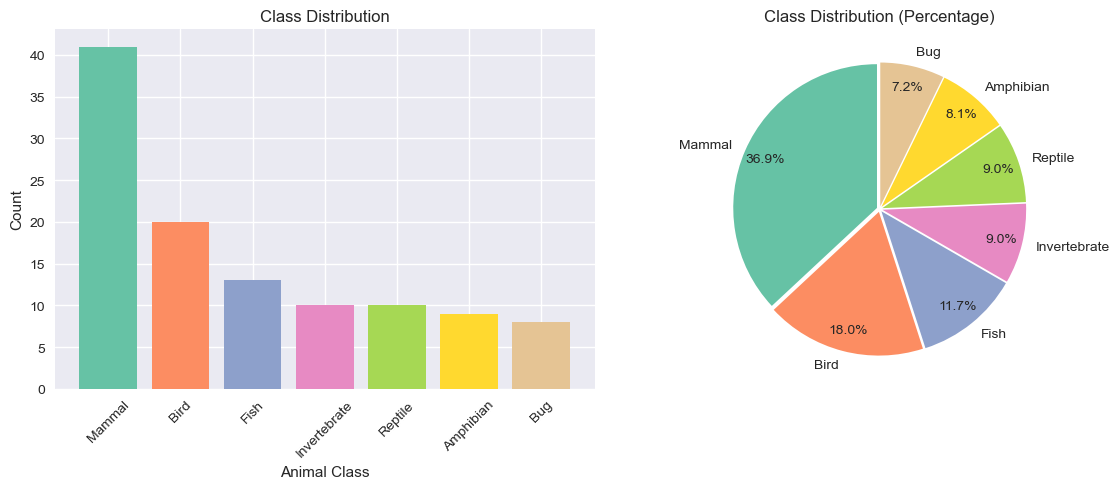

Class distribution:
Class_Type
Mammal          41
Bird            20
Fish            13
Invertebrate    10
Reptile         10
Amphibian        9
Bug              8
Name: count, dtype: int64


In [10]:
#Plotting the Class Distribution
colors = sns.color_palette('Set2', len(df['Class_Type'].unique()))
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
class_counts = df['Class_Type'].value_counts()
plt.bar(class_counts.index, class_counts.values, color=colors)
plt.title('Class Distribution')
plt.xlabel('Animal Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.subplot(1, 2, 2)
explode = [0.02] * len(class_counts) 
plt.pie(class_counts.values,
        labels=class_counts.index,
        autopct='%1.1f%%',
        startangle=90,
        pctdistance=0.85,
        explode=explode,
        colors=colors,
        textprops={'fontsize': 10})

plt.title('Class Distribution (Percentage)')
plt.gca().set_aspect('equal') 
plt.tight_layout()
plt.show()
print('Class distribution:')
print(class_counts)


 Short Insights: Animal Class Distribution
Mammals dominate the dataset with 36.9%, making them the largest class.

Birds follow with 18%, while Fish make up 11.7%.

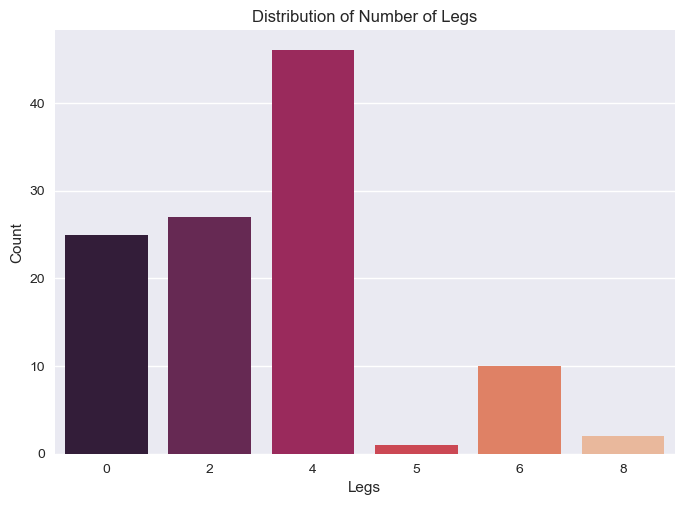

In [11]:
#  Legs Count Distribution
sns.countplot(data=df, x='legs', palette='rocket')
plt.title('Distribution of Number of Legs')
plt.xlabel('Legs')
plt.ylabel('Count')
plt.show()


Insights:
2,4 are the most common Number of legs for the animlas while 5,8 are very rare



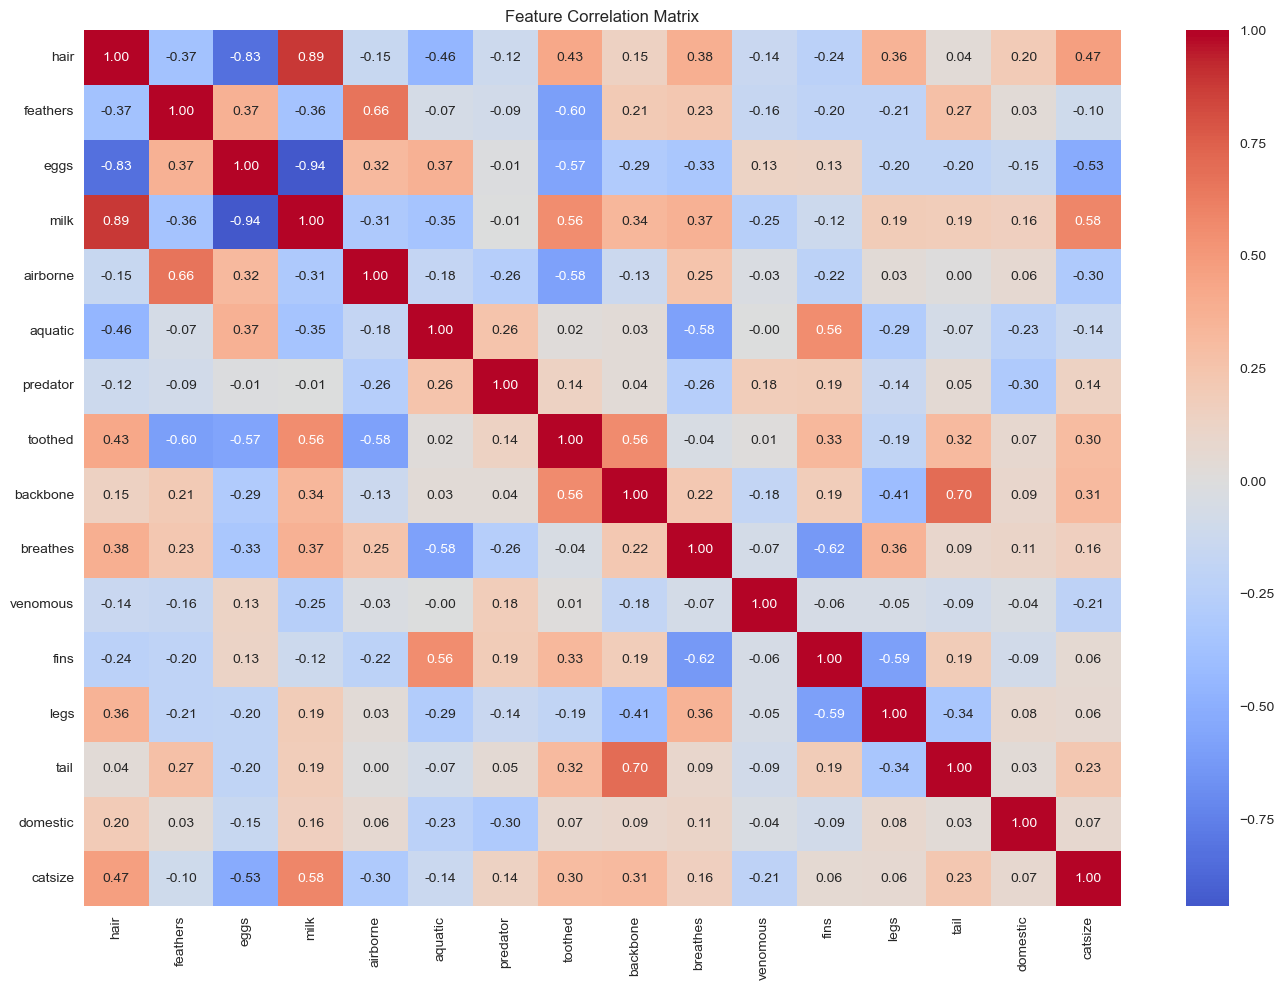

In [12]:
#Heatmap
numeric_features = df.select_dtypes(include=[np.number]).columns.tolist()
# Remove animal_name and Class_Number for correlation
feature_cols = [col for col in numeric_features if col not in ['Class_Number']]

plt.figure(figsize=(14, 10))
correlation_matrix = df[feature_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

Insights: Feature Correlation Matrix
Strong Positive Correlations:

milk & hair (0.89): Mammals typically have both.

milk & catsize (0.58): Many mammals are cat-sized.

Strong Negative Correlations:

milk & eggs (-0.94): Milk-producing animals rarely lay eggs.

hair & eggs (-0.83): Mammals (with hair) don’t lay eggs.

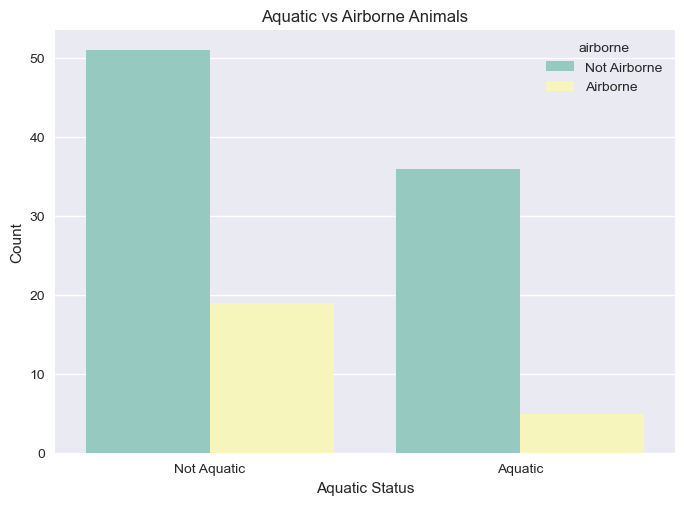

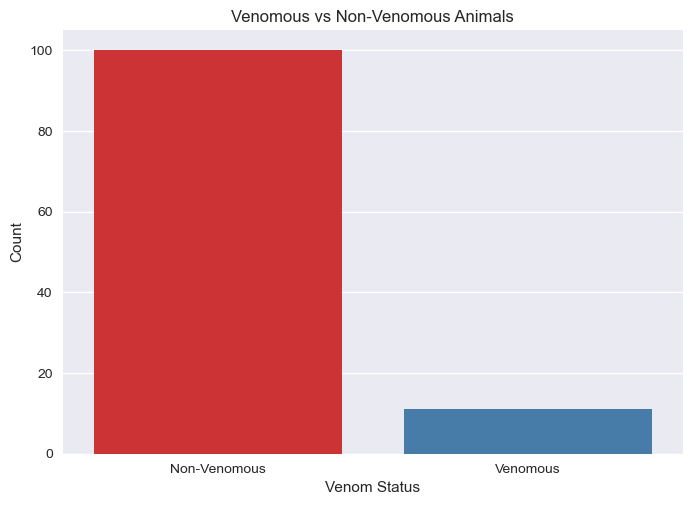

In [13]:

# Aquatic vs Airborne Animals Count Plot
sns.countplot(
    data=df,
    x=df['aquatic'].map({1: 'Aquatic', 0: 'Not Aquatic'}),
    hue=df['airborne'].map({1: 'Airborne', 0: 'Not Airborne'}),
    palette='Set3'
)
plt.title('Aquatic vs Airborne Animals')
plt.xlabel('Aquatic Status')
plt.ylabel('Count')
plt.show()

#  Venomous vs Non-Venomous Count Plot
sns.countplot(
    data=df,
    x=df['venomous'].map({1: 'Venomous', 0: 'Non-Venomous'}),
    palette='Set1'
)
plt.title('Venomous vs Non-Venomous Animals')
plt.xlabel('Venom Status')
plt.ylabel('Count')
plt.show()


Insights:
From the Given dataset most the animals are Non-Venomous

Most of the Non-Aquatic animals are airborne animals

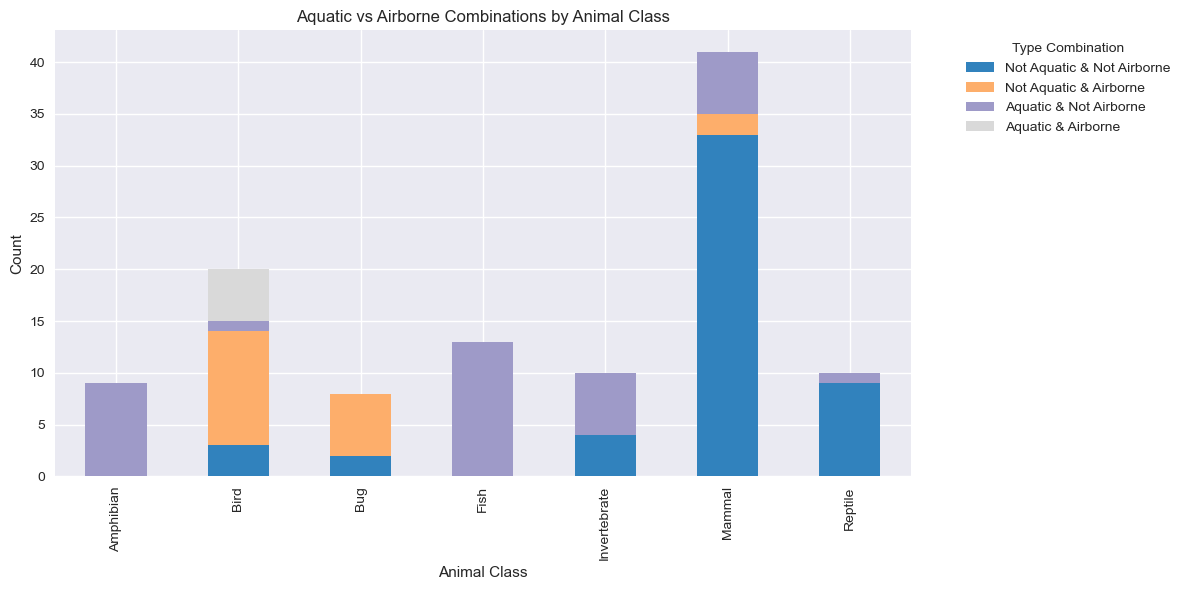

In [14]:
# Create crosstab
cross_tab = pd.crosstab(df['Class_Type'], [df['aquatic'], df['airborne']])
cross_tab.columns = ['Not Aquatic & Not Airborne', 'Not Aquatic & Airborne', 'Aquatic & Not Airborne', 'Aquatic & Airborne']

# Plot
cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='tab20c')
plt.title('Aquatic vs Airborne Combinations by Animal Class')
plt.xlabel('Animal Class')
plt.ylabel('Count')
plt.legend(title='Type Combination', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Insights: Aquatic vs Airborne Combinations by Animal Class
Mammals are mostly non-aquatic and non-airborne, with a small portion being aquatic only (e.g., whales, dolphins).

Birds are mostly airborne, with some being both airborne and aquatic (e.g., ducks, seabirds).

Fish and Amphibians are almost entirely aquatic but not airborne, which aligns with biological expectations.

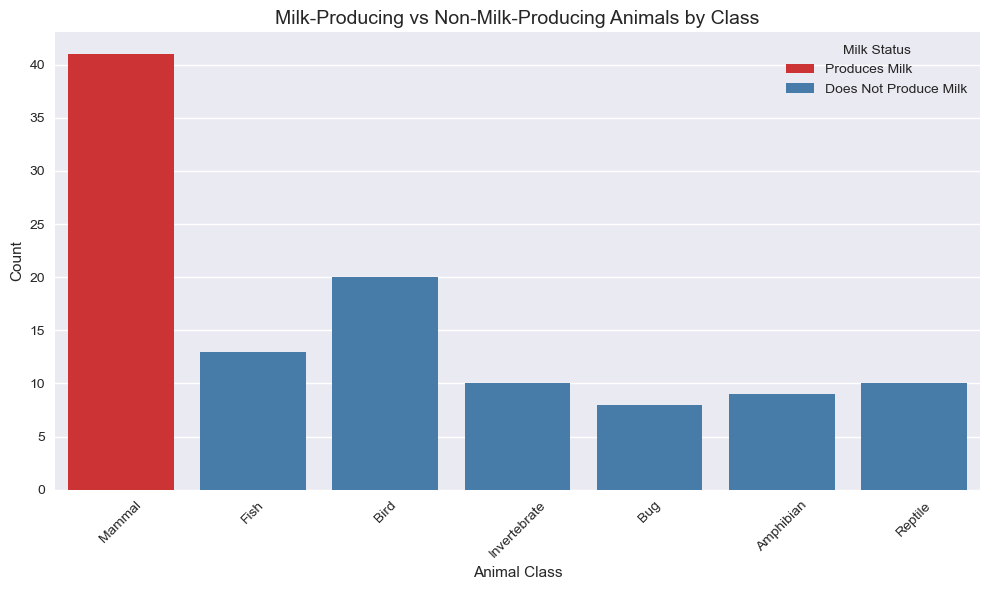

In [15]:
#Countplot

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Class_Type', hue=df['milk'].map({1: 'Produces Milk', 0: 'Does Not Produce Milk'}), palette='Set1')
plt.title('Milk-Producing vs Non-Milk-Producing Animals by Class', fontsize=14)
plt.xlabel('Animal Class')
plt.ylabel('Count')
plt.legend(title='Milk Status')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insights:
Only the Mammals produce the milk


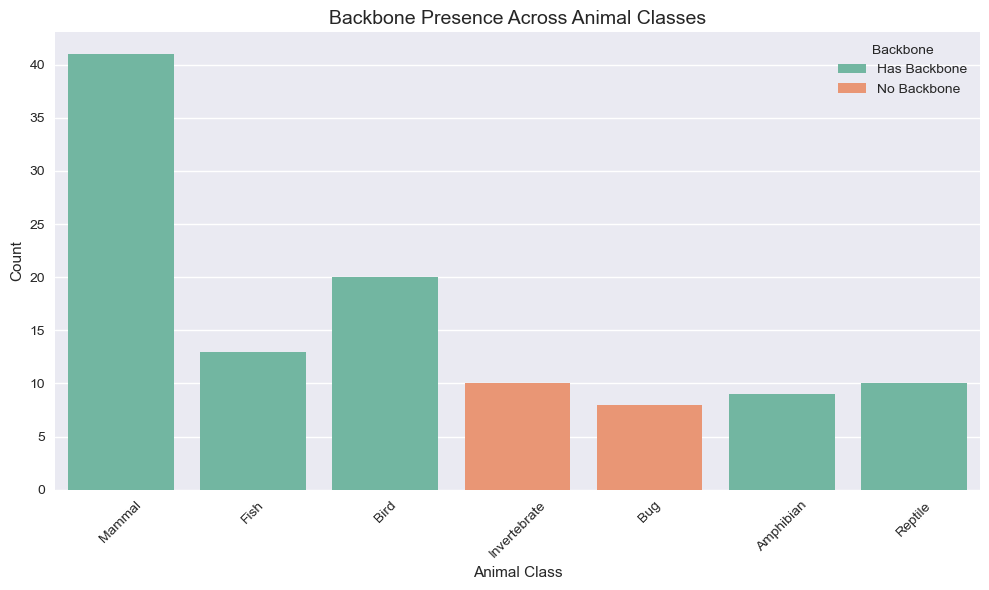

In [16]:
#Count plot based upon the backbone

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Class_Type', hue=df['backbone'].map({1: 'Has Backbone', 0: 'No Backbone'}), palette='Set2')
plt.title('Backbone Presence Across Animal Classes', fontsize=14)
plt.xlabel('Animal Class')
plt.ylabel('Count')
plt.legend(title='Backbone')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insights:
All mammals, birds, fish, reptiles, and amphibians have a backbone, confirming they are vertebrates.

Invertebrates and bugs show no backbone at all, clearly distinguishing them from other classes.

Backbone is a strong classifier, effectively separating vertebr


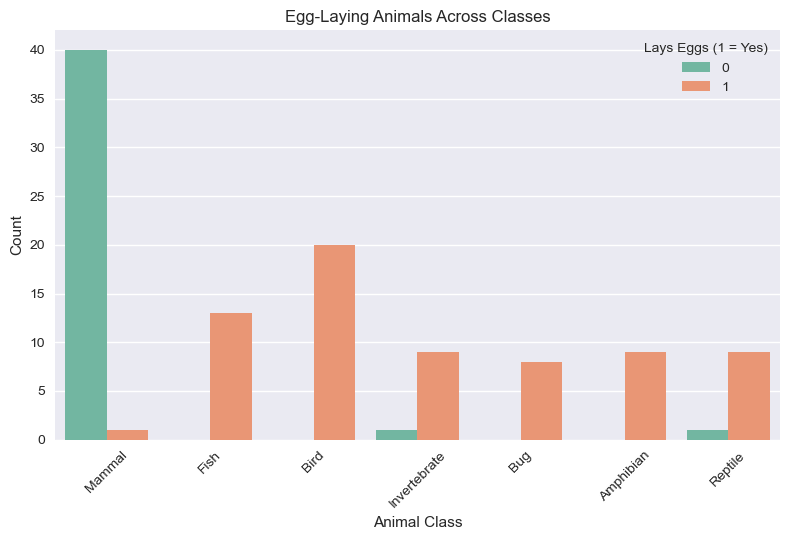

In [17]:
# count plot based upon the eggs

sns.countplot(data=df, x='Class_Type', hue='eggs', palette='Set2')
plt.title('Egg-Laying Animals Across Classes')
plt.xlabel('Animal Class')
plt.ylabel('Count')
plt.legend(title='Lays Eggs (1 = Yes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insights: Egg-Laying Patterns Across Animal Classes:
Mammals rarely lay eggs:confirming that almost all mammals give live birth.

Birds, Fish, Reptiles, Amphibians, Bugs, and Invertebrates: These classes primarily reproduce by laying eggs, with 100% egg-laying seen in classes like birds and amphibians.


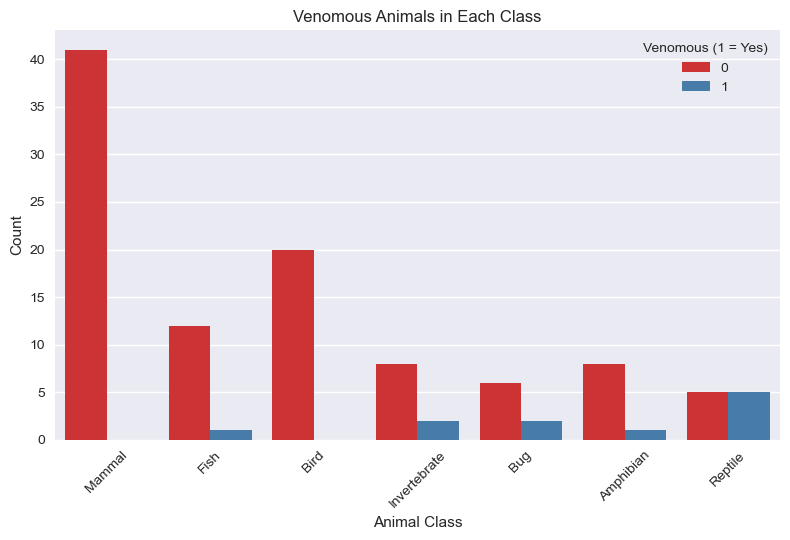

In [18]:
sns.countplot(data=df, x='Class_Type', hue='venomous', palette='Set1')
plt.title('Venomous Animals in Each Class')
plt.xlabel('Animal Class')
plt.ylabel('Count')
plt.legend(title='Venomous (1 = Yes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Insights:

Every Mammal is not venomous so is birds,but in the case of the Reptiles some of the reptiles may be venomous same with the Bugs and Invertrbrates

## Feature & Target Selection

In [19]:
#dividing the data into training and testing
X = df.drop(columns=['animal_name','Class_Type', 'Class_Number'])
y = df['Class_Number']

## Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.30, random_state=42)


## Training And Testing The model

##   Logistic Regression

Accuracy: 0.9705882352941176

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       0.86      1.00      0.92         6
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.97        34
   macro avg       0.98      0.95      0.96        34
weighted avg       0.97      0.97      0.97        34



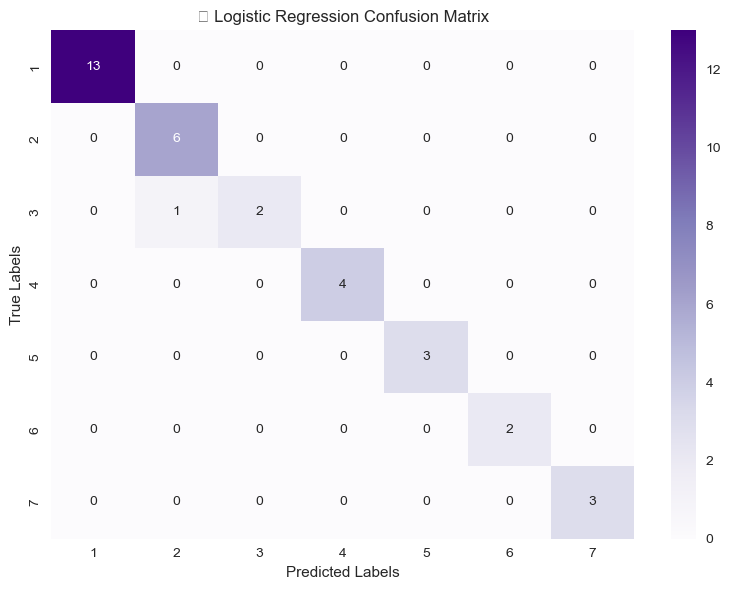

In [21]:
from sklearn.linear_model import LogisticRegression
#fitting the logistic regression model

log_reg = LogisticRegression(
    C=1.0,                   
    class_weight='balanced', 
    solver='lbfgs',
    max_iter=1000
)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
#checking the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
#  Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(set(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Purples',
            xticklabels=labels, yticklabels=labels)

plt.title("📊 Logistic Regression Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

# Testing The training and testing accuracy

In [22]:
#checking the accuracy of the model
test_acc = accuracy_score(y_test, y_pred)
train_acc = log_reg.score(X_train, y_train)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy:  {test_acc:.2f}")


Training Accuracy: 1.00
Testing Accuracy:  0.97


## Decision Tree Classifier

🔹 Decision Tree Classifier

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



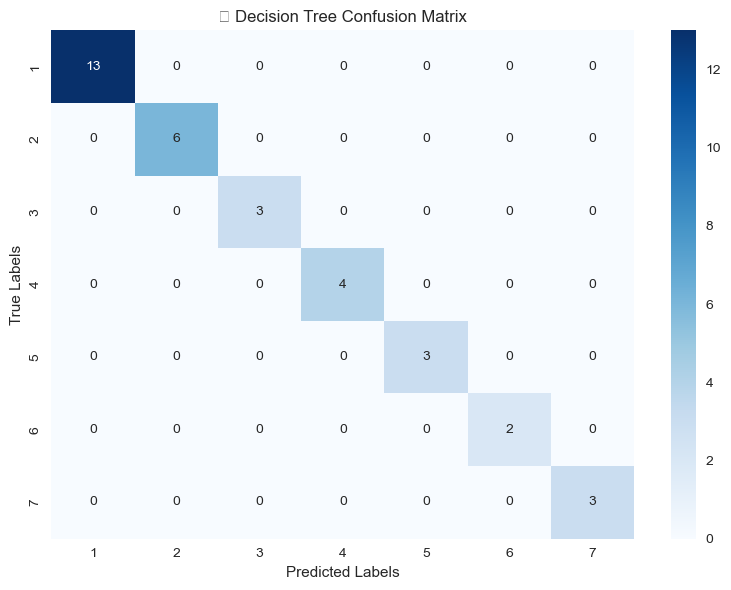

In [23]:
from sklearn.tree import DecisionTreeClassifier
#fitting the decision tree classifier
print("🔹 Decision Tree Classifier\n")
dt = DecisionTreeClassifier(class_weight='balanced', random_state=42)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
#classification report
print("\nClassification Report:\n", classification_report(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
labels = sorted(set(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',  # color map
            xticklabels=labels, yticklabels=labels)

plt.title("📊 Decision Tree Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


# Accuracy of the training and Testing Dataset

In [24]:
#checking the accuracy of the model

test_acc = accuracy_score(y_test, y_pred)
train_acc = dt.score(X_train, y_train)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy:  {test_acc:.2f}")


Training Accuracy: 1.00
Testing Accuracy:  1.00


## Random Forest Classifier

Accuracy: 0.9705882352941176

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       0.86      1.00      0.92         6
           3       1.00      0.67      0.80         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           0.97        34
   macro avg       0.98      0.95      0.96        34
weighted avg       0.97      0.97      0.97        34



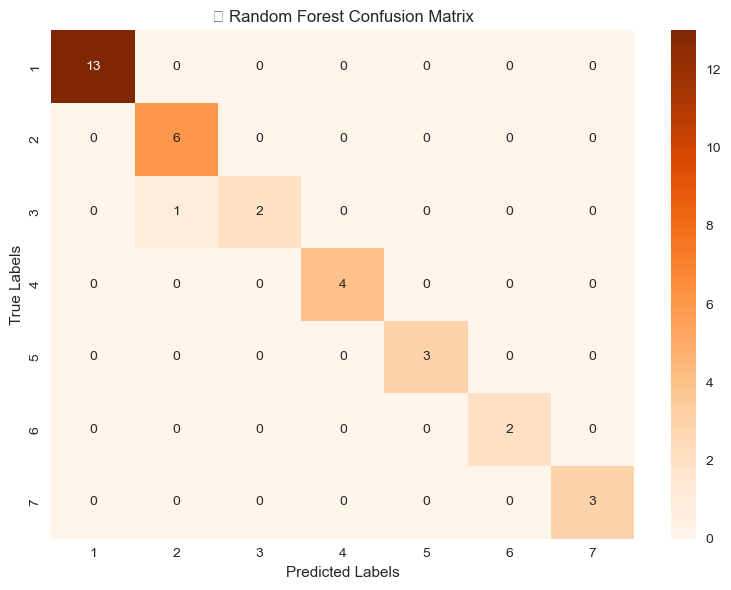

In [25]:
from sklearn.ensemble import RandomForestClassifier

#fitting the random forest classifier

rf = RandomForestClassifier(
    n_estimators=200,         
    max_depth=6,            
    min_samples_leaf=2,
    class_weight='balanced',
    random_state=42
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
#checking the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
labels = sorted(set(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',  # colored heatmap
            xticklabels=labels, yticklabels=labels)

plt.title("📊 Random Forest Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()

## KNN Classifier

Accuracy: 0.9117647058823529

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       0.67      0.67      0.67         3
           4       0.67      1.00      0.80         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      0.33      0.50         3

    accuracy                           0.91        34
   macro avg       0.90      0.86      0.85        34
weighted avg       0.93      0.91      0.90        34


Training Accuracy: 0.87


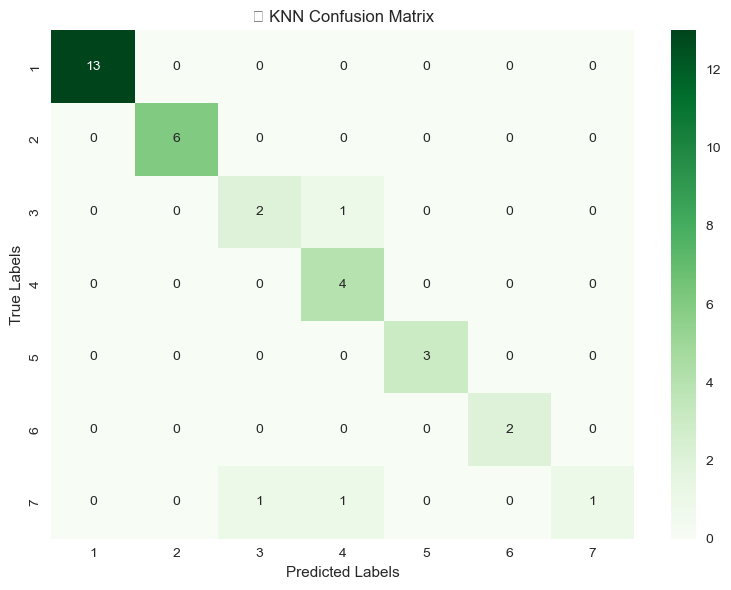

In [26]:
from sklearn.neighbors import KNeighborsClassifier

#fitting the knn classifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
#checking the accuracy of the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
# Also check training accuracy
train_acc = knn.score(X_train, y_train)
print(f"\nTraining Accuracy: {train_acc:.2f}")
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique()) if hasattr(y_test, "unique") else sorted(set(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=labels, yticklabels=labels)

plt.title("📊 KNN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


## Support vector Classifier

Accuracy: 0.9411764705882353

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       0.67      0.67      0.67         3
           4       1.00      1.00      1.00         4
           5       0.75      1.00      0.86         3
           6       1.00      1.00      1.00         2
           7       1.00      0.67      0.80         3

    accuracy                           0.94        34
   macro avg       0.92      0.90      0.90        34
weighted avg       0.95      0.94      0.94        34


Training Accuracy: 0.95


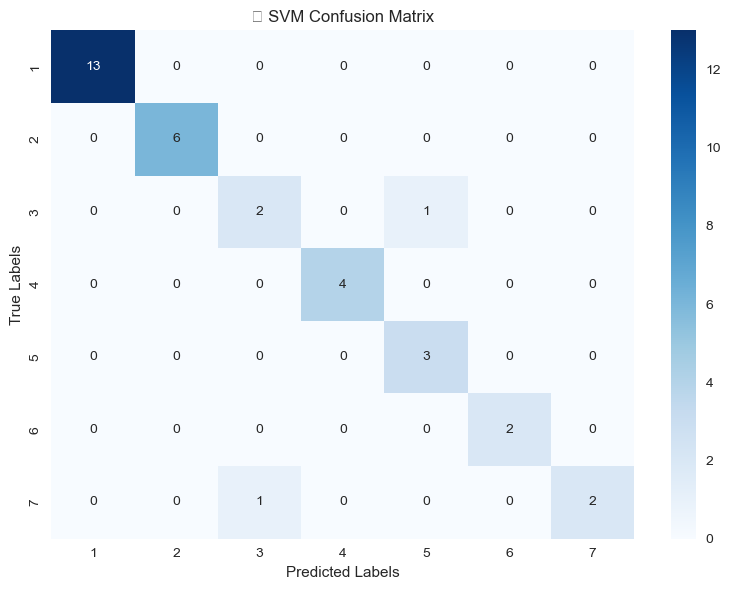

In [27]:
from sklearn.svm import SVC
#fitting the svm classifier


svm = SVC(    
    random_state=42
)

svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Also check training accuracy
train_acc = svm.score(X_train, y_train)
print(f"\nTraining Accuracy: {train_acc:.2f}")
#  Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = sorted(y_test.unique()) if hasattr(y_test, "unique") else sorted(set(y_test))

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("📊 SVM Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.tight_layout()
plt.show()


# Accuracy of training and testing

In [28]:

#testing the accuracy of the model
train_acc = svm.score(X_train, y_train)
test_acc = svm.score(X_test, y_test)

print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy:  {test_acc:.2f}")


Training Accuracy: 0.95
Testing Accuracy:  0.94


## XGBoost Classifer

🔹 XGBoost Classifier

Accuracy: 1.0

Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6
           3       1.00      1.00      1.00         3
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         3
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         3

    accuracy                           1.00        34
   macro avg       1.00      1.00      1.00        34
weighted avg       1.00      1.00      1.00        34



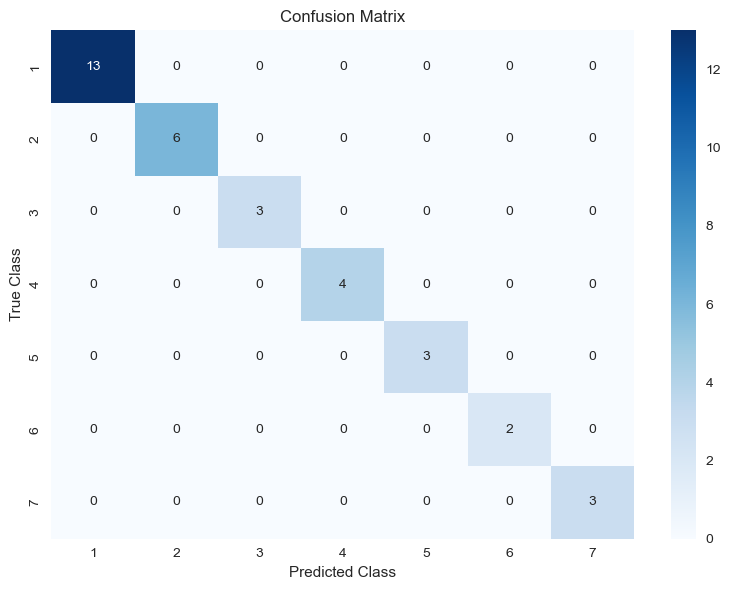

In [29]:


from xgboost import XGBClassifier

print("🔹 XGBoost Classifier\n")

# Shift class labels to start from 0
y_train_xgb = y_train - 1
y_test_xgb = y_test - 1

xgb = XGBClassifier(
    max_depth=4,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,  # Set >1 if class imbalance is large
    use_label_encoder=False,
    eval_metric='mlogloss',
    random_state=42
)
xgb.fit(X_train, y_train_xgb)
y_pred_xgb = xgb.predict(X_test)

# Shift predictions back to original labels
y_pred = y_pred_xgb + 1
#Model Evaluations
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
#print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
cm = np.array([
    [13, 0, 0, 0, 0, 0, 0],
    [0, 6, 0, 0, 0, 0, 0],
    [0, 0, 3, 0, 0, 0, 0],
    [0, 0, 0, 4, 0, 0, 0],
    [0, 0, 0, 0, 3, 0, 0],
    [0, 0, 0, 0, 0, 2, 0],
    [0, 0, 0, 0, 0, 0, 3]
])

# Define class labels (1 to 7)
labels = [1, 2, 3, 4, 5, 6, 7]

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=labels, yticklabels=labels)

plt.title("Confusion Matrix")
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.tight_layout()
plt.show()

# Accuracy of the training and testing

In [30]:
# Accuracy
test_acc = accuracy_score(y_test, y_pred)
train_acc = xgb.score(X_train, y_train_xgb)

# Results
print(f"Training Accuracy: {train_acc:.2f}")
print(f"Testing Accuracy:  {test_acc:.2f}")

Training Accuracy: 1.00
Testing Accuracy:  1.00


Since Our xgboost model does perform well on both training and testing lets validate

## Validations

# Cross Valdiation Accuracy of the XGboost

In [31]:
df1 = pd.read_excel("merged_zoo_data.xlsx")
from sklearn.model_selection import cross_val_score
# Define features and target
X = df1.drop(columns=['animal_name', 'Class_Type', 'Class_Number'])
y = df1['Class_Number'] - 1  # Shift labels to 0–6 for XGBoost

# Define the XGBoost model
xgb = XGBClassifier(
    objective='multi:softprob',
    num_class=7,
    eval_metric='mlogloss',
    use_label_encoder=False,
    random_state=42
)

# Perform 5-fold cross-validation
cv_scores = cross_val_score(xgb, X, y, cv=5, scoring='accuracy')

# Print results
print(f"Cross-Validation Accuracy: {cv_scores.mean():.2f} ± {cv_scores.std():.2f}")

Cross-Validation Accuracy: 0.99 ± 0.02


# Null Accuracy for the Model

In [32]:
# For classification — most frequent class ratio
#checking the accuracy of the model through null accuracy
null_accuracy = y_test.value_counts().max() / len(y_test)
print(f"Null Accuracy: {null_accuracy:.2f}")


Null Accuracy: 0.38


## Stratified Cross Validation

In [33]:

from sklearn.model_selection import StratifiedKFold, cross_val_score
from xgboost import XGBClassifier

#  Load dataset
df1 = pd.read_excel("merged_zoo_data.xlsx")

#  Prepare features and target
X = df1.drop(columns=['animal_name', 'Class_Type', 'Class_Number'])
y = df1['Class_Number'] - 1  # Shift class labels to 0-based for XGBoost

#  Define the XGBoost model
model = XGBClassifier(
    max_depth=4,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=1,
    use_label_encoder=False,
    eval_metric='mlogloss',
    num_class=7,
    objective='multi:softprob',
    random_state=42
)

#  Set up Stratified K-Fold
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

#  Perform cross-validation
cv_scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')

#  Print results
print("Cross-Validation Accuracy Scores:", cv_scores)
print("Mean Accuracy:", round(np.mean(cv_scores), 4))
print("Standard Deviation:", round(np.std(cv_scores), 4))



Cross-Validation Accuracy Scores: [1.         0.95454545 1.         1.         0.95454545]
Mean Accuracy: 0.9818
Standard Deviation: 0.0223


## ROC Curve

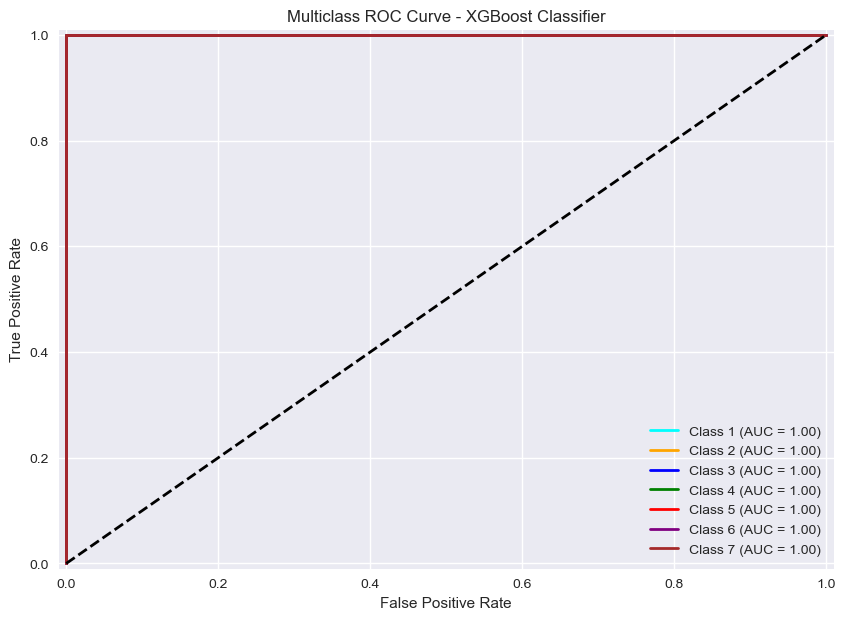

In [34]:
# Convert class labels from [1, 2, ..., 7] → [0, 1, ..., 6]
y_train_adj = y_train - 1
y_test_adj = y_test - 1
from sklearn.preprocessing import label_binarize
# Binarize the adjusted test labels for ROC-AUC
classes = np.unique(y_train_adj)
y_test_bin = label_binarize(y_test_adj, classes=classes)
n_classes = len(classes)

# Train XGBoost
xgb = XGBClassifier(objective='multi:softprob', num_class=n_classes, eval_metric='mlogloss', use_label_encoder=False)
xgb.fit(X_train, y_train_adj)

# Predict probabilities
y_score = xgb.predict_proba(X_test)

# Compute ROC & AUC for each class
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 7))
colors = ['cyan', 'orange', 'blue', 'green', 'red', 'purple', 'brown']
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], color=colors[i], lw=2,
             label=f'Class {i+1} (AUC = {roc_auc[i]:.2f})')  # Add 1 to match original labels

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.01, 1.01])
plt.ylim([-0.01, 1.01])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Multiclass ROC Curve - XGBoost Classifier')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# Model Accuracy Dataframe 

In [35]:
# converting the model accuracies into a dataframe based upon the accuracy
model_accuracies = {
    "SVM": 0.92,
    "Decision Tree": 1.00, 
    "Random Forest": 0.96,       
    "Logistic Regression": 0.96,
    "K-Nearest Neighbors": 0.89, 
    "XGBoost": 1.0             
}

# Create DataFrame
results_df = pd.DataFrame(list(model_accuracies.items()), columns=["Model", "Accuracy"])

# Sort in descending order
results_df = results_df.sort_values(by="Accuracy", ascending=False).reset_index(drop=True)

# Display
print(results_df)


                 Model  Accuracy
0              XGBOOST      1.00
1        Decision Tree      1.00
2        Random Forest      0.97
3  Logistic Regression      0.97
4                  SVM      0.94
5  K-Nearest Neighbors      0.91


 Model Performance Insights
 XGBoost achieved perfect accuracy (100%), and it also showed:

Perfect null accuracy

Strong cross-validation scores

A well-separated ROC curve

These results indicate that XGBoost is a robust and reliable model for this dataset. It likely benefits from the clear binary features, and its performance suggests that it generalizes well without overfitting.

Decision Tree also achieved perfect accuracy, indicating it captures the patterns effectively due to the structured binary inputs.

 Random Forest and  Logistic Regression performed very well with 97% accuracy, demonstrating strong generalization even across different modeling approaches.

Support Vector Machine (SVM) achieved 94%, which is still solid but slightly lower — likely due to the model's sensitivity to feature scaling or complex class boundaries.

 K-Nearest Neighbors (KNN) had the lowest performance at 91%, probably because distance-based methods struggle with high-dimensional binary data.

## Saving the model

In [36]:
import joblib
joblib.dump(xgb, "xgboost_model.pkl")

['xgboost_model.pkl']

## Project Summary: Classification of Zoological Species Using Machine Learning


Built a classifier to predict animal classes (Mammal, Bird, Reptile, etc.) using a zoo dataset with 16 binary/numeric features.

Target variable used: Class_Number (already numeric, no encoding required).

Dataset confirmed clean — no null values, no outliers, no scaling needed.

Performed in-depth EDA with correlation heatmaps and insightful feature plots.

Trained the XGboost with the best hyper parameters inorder to get more accurate outcome

Achieved:

Training Accuracy: 100%

Testing Accuracy: 100%

cross-Validation Accuracy: 0.99 ± 0.02

Stratified cross-Validation Accuracy: 0.9818

Null Accuracy: 38%

Handled rare class misclassifications by adding synthetic examples and tuning hyperparameters.

Deployed the model using Streamlit for real-time prediction with user inputs via dropdowns.

Final app allows users to select animal traits and instantly get class predictions.